# Vertical atmospheric transparency 

- author : Sylvie Dagoret-Campagne
- date : April 26th 2018

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [3]:
from astropy.io import fits

In [4]:
#  column 0 : count number
#  column 1 : aerosol value
#  column 2 : pwv value
#  column 3 : ozone value
#  column 6 : data start 
#
index_atm_count=0
index_atm_aer=1
index_atm_pwv=2
index_atm_oz=3
index_atm_ps=4
index_atm_cloud=5
index_atm_data=6

NB_atm_HEADER=6
#NB_atm_DATA=len(WL)-1

In [5]:
file_simu='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_atmsim.fits'
hdu = fits.open(file_simu)
data=hdu[0].data

In [6]:
file_merra2='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_AllYear.csv'
df_merra2=pd.read_csv(file_merra2,index_col=0)
df_merra2.index.name='time'

In [7]:
file_logbook_ctio='ctiofulllogbook_jun2017_v4.csv'
df_ctio=pd.read_csv(file_logbook_ctio,sep=';')
df_ctio=df_ctio.reindex(columns=['date','P','T','RH','airmass','seeing','exposure','object','filter','disperser','focus','W','file']).set_index('date').sort_index()

In [8]:
data.shape

(2929, 957)

In [17]:
transp=data[1:,index_atm_data:]
WL=data[0,index_atm_data:]

In [10]:
transp_sum=np.sum(transp,axis=1)

In [11]:
len(transp_sum)

2928

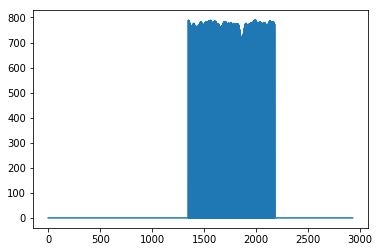

In [12]:
plt.plot(transp_sum)

In [15]:
selected_indexes=np.where(transp_sum>0)[0]

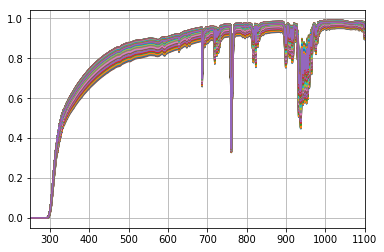

In [19]:
for idx in selected_indexes:
    plt.plot(WL,transp[idx,:])
    plt.grid()
    plt.xlim(WL[0],1100)